In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df  = pd.read_csv("customer_data.csv")

In [135]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,ProductCategory,PurchaseAmount,MembershipStatus
0,1,56,Male,65648,5,Hyderabad,Groceries,3419.45,Gold
1,2,69,Male,123537,84,Mumbai,Electronics,2199.44,Platinum
2,3,46,Male,145991,65,Delhi,Books,3684.33,Gold
3,4,32,Female,29516,30,Delhi,Books,4139.91,Silver
4,5,60,Male,132863,21,Chennai,Groceries,817.54,Gold


In [136]:
#check null values
df.isnull().sum()

CustomerID          0
Age                 0
Gender              0
AnnualIncome        0
SpendingScore       0
City                0
ProductCategory     0
PurchaseAmount      0
MembershipStatus    0
dtype: int64

In [137]:
# description of the data 
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseAmount
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,500.500000,43.81900,87130.677000,48.82600,2494.475220
std,288.819436,14.99103,38333.193443,29.12181,1412.172759
min,1.000000,18.00000,20207.000000,1.00000,100.150000
25%,250.750000,31.00000,52723.250000,22.00000,1262.985000
50%,500.500000,44.00000,88482.000000,48.00000,2469.385000
75%,750.250000,56.00000,121396.750000,74.00000,3687.582500
max,1000.000000,69.00000,149839.000000,99.00000,4988.970000


In [138]:
df["ProductCategory"].unique()


array(['Groceries', 'Electronics', 'Books', 'Clothing', 'Home Decor'],
      dtype=object)

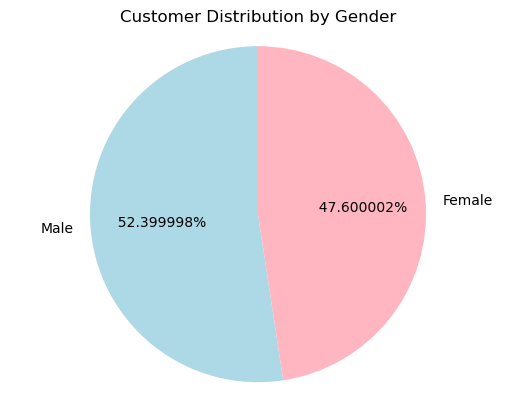

In [139]:
# Plot a pie chart of customer distribution by Gender.
gender = df['Gender'].value_counts()
plt.pie(gender,labels=gender.index,  autopct='%11f%%', startangle=90, colors=['lightblue', 'lightpink', 'lightgreen'])
plt.title("Customer Distribution by Gender")
plt.axis('equal')
plt.show()

Gender
Female    2501.627668
Male      2487.977958
Name: PurchaseAmount, dtype: float64


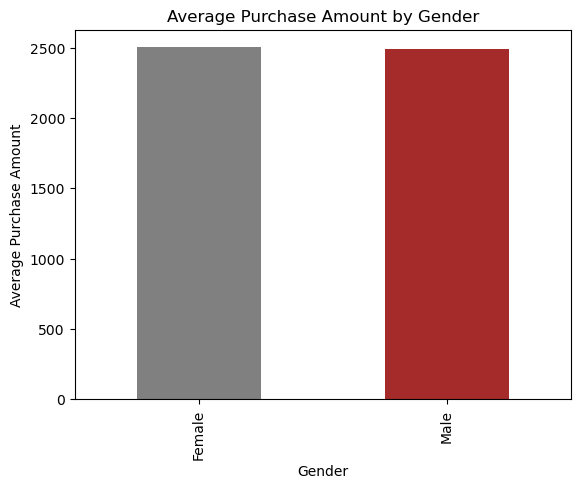

In [140]:

# Average PurchaseAmount per Gender.
avg = df.groupby('Gender')['PurchaseAmount'].mean()



print(avg)

avg.plot(kind='bar', color=['gray', 'brown'])
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Gender')
plt.show()

AgeGroup
18-25    2489.909351
26-35    2483.271850
Name: PurchaseAmount, dtype: float64


C:\Users\vloga\AppData\Local\Temp\ipykernel_25152\2910550336.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_age = df.groupby('AgeGroup')['PurchaseAmount'].mean()


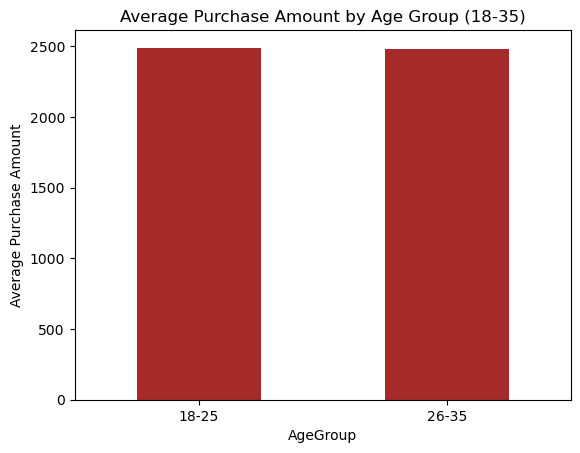

In [141]:

# Which age group spends the most? Use binning for Age: (18-25, 26-35)✅
bins = [17, 25, 35]  # use 17 to include 18, and 35 to include up to 35
labels = ['18-25', '26-35']

# Create AgeGroup column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Group by AgeGroup and calculate average PurchaseAmount
avg_purchase_age = df.groupby('AgeGroup')['PurchaseAmount'].mean()

# Print result
print(avg_purchase_age)

# Optional: Plot
avg_purchase_age.plot(kind='bar', color='brown')
plt.title('Average Purchase Amount by Age Group (18-35)')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'The Revenue By City.')

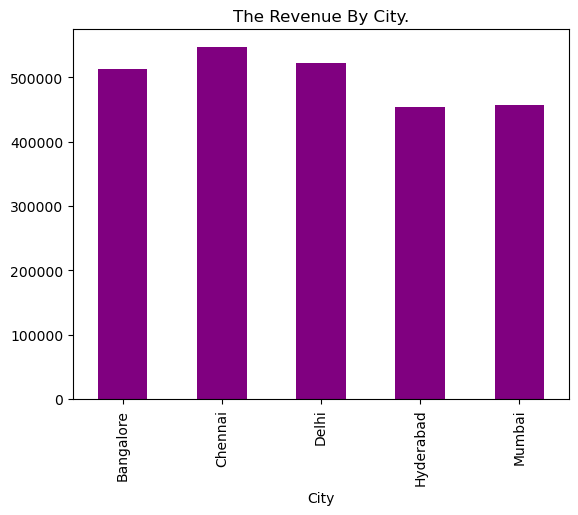

In [142]:
# find total revenue of all city 
cityrevenue=df.groupby("City")["PurchaseAmount"].sum()

cityrevenue.plot(kind="bar",color="purple")
plt.title('The Revenue By City.')


In [143]:

# Average SpendingScore per city.
cityrevenueavg=df.groupby("City")[["PurchaseAmount",'SpendingScore']].mean()
cityrevenueavg

,PurchaseAmount,SpendingScore
City,,
Bangalore,2501.414976,50.448780
Chennai,2631.371250,50.894231
Delhi,2464.711934,48.745283
Hyderabad,2318.427959,48.831633
Mumbai,2555.469944,44.653631


Text(0.5, 1.0, 'Avarage spending score data by city.')

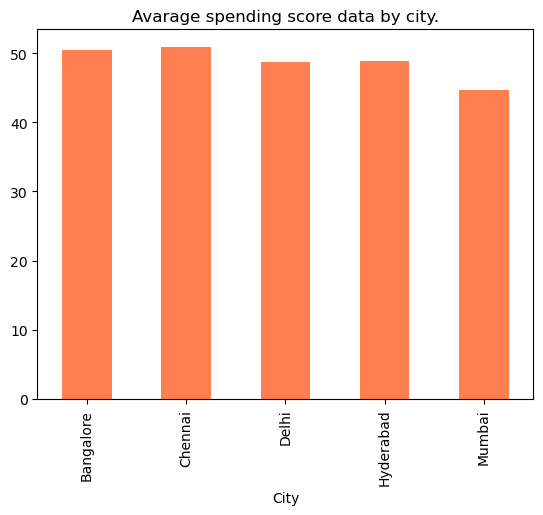

In [144]:
avg_revenue_score=df.groupby("City")['SpendingScore'].mean()
avg_revenue_score.plot(kind='bar',color="coral")
plt.title('Avarage spending score data by city.')

In [145]:
# give me top  productcategories by total purcahase
df.groupby('ProductCategory')['PurchaseAmount'].sum()

ProductCategory
Books          522863.11
Clothing       440770.29
Electronics    469792.82
Groceries      532808.04
Home Decor     528240.96
Name: PurchaseAmount, dtype: float64

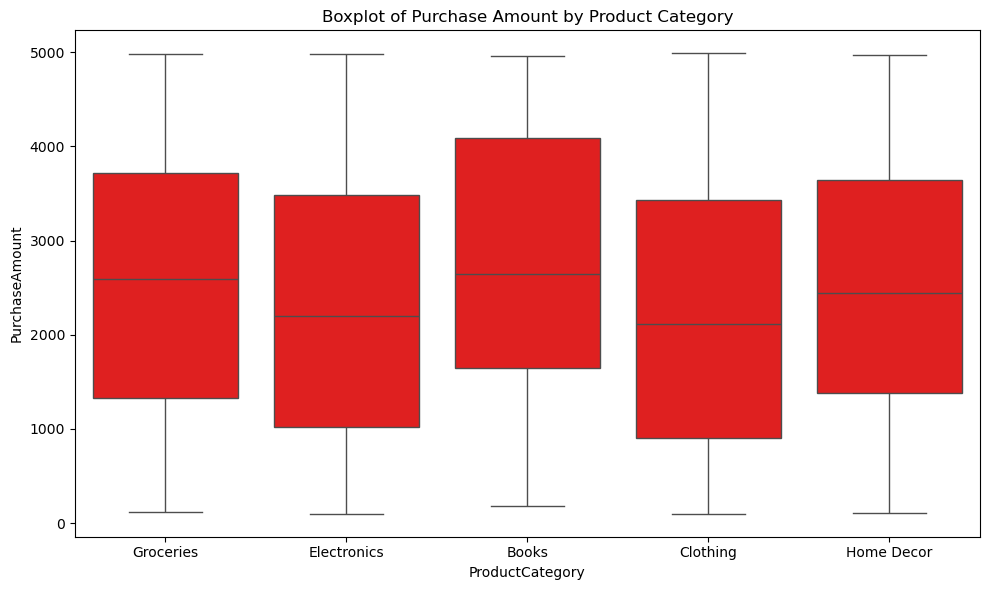

In [146]:
# Plot a boxplot of PurchaseAmount by ProductCategory.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ProductCategory', y='PurchaseAmount',color="red")
plt.title('Boxplot of Purchase Amount by Product Category')

plt.tight_layout()
plt.show()



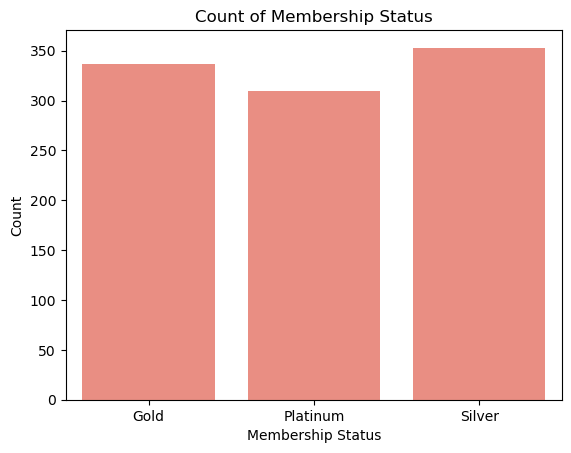

In [147]:
# Countplot of MembershipStatus.
sns.countplot(x='MembershipStatus', data=df, color="salmon")
plt.title('Count of Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Count')

plt.show()


MembershipStatus
Gold        2545.217953
Platinum    2471.710194
Silver      2466.024391
Name: PurchaseAmount, dtype: float64


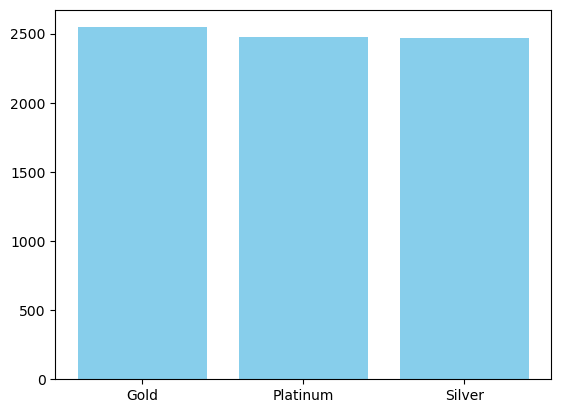

In [148]:
# Which membership group has the highest average spending?

avg_spending = df.groupby('MembershipStatus')['PurchaseAmount'].mean().sort_values(ascending=False)

print(avg_spending)
# Are there spending differences between Gold, Silver, and Platinum members?
bars = plt.bar(avg_spending.index, avg_spending.values, color='skyblue')
plt.show()


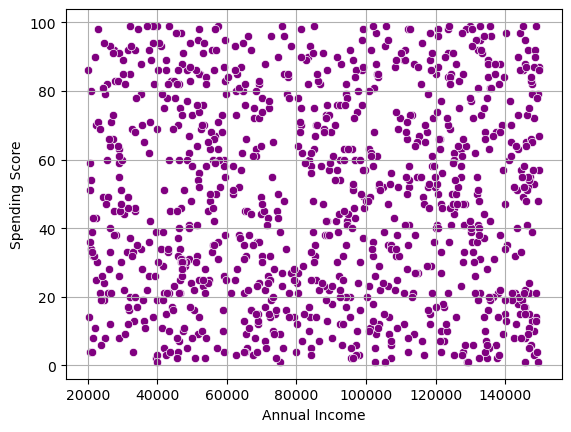

In [149]:
# create scatter plot and show annual income
sns.scatterplot(data=df,x= 'AnnualIncome',y="SpendingScore", color="purple")
plt.Figure(figsize=(8,5))
plt.grid(True)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [150]:
df

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,ProductCategory,PurchaseAmount,MembershipStatus,AgeGroup
0,1,56,Male,65648,5,Hyderabad,Groceries,3419.45,Gold,NaN
1,2,69,Male,123537,84,Mumbai,Electronics,2199.44,Platinum,NaN
2,3,46,Male,145991,65,Delhi,Books,3684.33,Gold,NaN
3,4,32,Female,29516,30,Delhi,Books,4139.91,Silver,26-35
4,5,60,Male,132863,21,Chennai,Groceries,817.54,Gold,NaN
...,...,...,...,...,...,...,...,...,...,...
995,996,60,Female,92982,6,Mumbai,Electronics,3450.96,Platinum,NaN
996,997,64,Male,122747,90,Bangalore,Groceries,224.21,Silver,NaN
997,998,62,Female,75922,27,Bangalore,Clothing,3481.23,Platinum,NaN
998,999,35,Male,68231,8,Chennai,Clothing,1648.90,Gold,26-35
